# Seção 09.02 - Support Vector Machines (base censo)
Para esta seção, usarei a base de dados "census.csv" disponibilizada no curso do Professor Jones na UDEMY.

In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Lidar com validação de modelos.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
nomeDaBase = "../bases/census.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8")

In [3]:
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
final-weight,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
final-weight      32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loos      32561 non-null int64
hour-per-week     32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
final-weight,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loos,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hour-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
dp.cardinalidade(df)

,Atributo,Cardinalidade,Valores
6,sex,2,"[ Male, Female]"
8,income,2,"[ <=50K, >50K]"
5,race,5,"[ White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other]"
4,relationship,6,"[ Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative]"
2,marital-status,7,"[ Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed]"
0,workclass,9,"[ State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked]"
3,occupation,15,"[ Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, ?, Protective-serv, Armed-Forces, Priv-house-serv]"
1,education,16,"[ Bachelors, HS-grad, 11th, Masters, 9th, Some-college, Assoc-acdm, Assoc-voc, 7th-8th, Doctorate, Prof-school, 5th-6th, 10th, 1st-4th, Preschool, 12th]"
7,native-country,42,"[ United-States, Cuba, Jamaica, India, ?, Mexico, South, Puerto-Rico, Honduras, England, Canada, Germany, Iran, Philippines, Italy, Poland, Columbia, Cambodia, Thailand, Ecuador, Laos, Taiwan, Haiti, Portugal, Dominican-Republic, El-Salvador, France, Guatemala, China, Japan, Yugoslavia, Peru, Outlying-US(Guam-USVI-etc), Scotland, Trinadad&Tobago, Greece, Nicaragua, Vietnam, Hong, Ireland, Hungary, Holand-Netherlands]"


### Problemas encontrados na base:

Não foram encontrados problemas na base. Não há valores nulos e nenhum valor incoerente.
**Um ponto de atenção é o valor "?" nos atributos "workclass", "occupation" e "native-country".**

#### OBSERVAÇÃO:

No mundo real, os problemas com as bases são muito piores. Deve-se ter muita atenção pois os dados podem não representar a realidade do processo.

## 1) Tratando o df para ser consumido pelo modelo

In [7]:
# Copiando df original para um novo df (df_tratado).

df_tratado = df.copy()

df_obj = df_tratado.select_dtypes(exclude=["int64", "float64"])

df_tratado[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

for i in ["workclass", "occupation", "native-country"]:
    df_tratado[i].replace('?', np.nan, inplace=True)

state_dummies = pd.get_dummies(df_tratado[df_obj.columns], drop_first=True)

df_tratado.drop(df_obj.columns, axis=1, inplace=True)

df_tratado = pd.concat([df_tratado, state_dummies], axis=1)

In [9]:
df_tratado.head().T

,0,1,2,3,4
age,39,50,38,53,28
final-weight,77516,83311,215646,234721,338409
education-num,13,13,9,7,13
capital-gain,2174,0,0,0,0
capital-loos,0,0,0,0,0
hour-per-week,40,13,40,40,40
workclass_Local-gov,0,0,0,0,0
workclass_Never-worked,0,0,0,0,0
workclass_Private,0,0,1,1,1
workclass_Self-emp-inc,0,0,0,0,0


## 2) Aplicação do modelo

### 2.1) Usando *train_test_split*  

In [10]:
# Separando os fatores/previsores da resposta/target:
    
x = df_tratado.iloc[:, 0:-1]
y = df_tratado.iloc[:, -1]

## Escalonamento
Nesse algoritmo é importante executar o escalonamento.

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.



In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Aplicando o modelo

In [15]:
from sklearn.svm import SVC

classificador = SVC(kernel='linear', random_state=0)
classificador.fit(x_train, y_train)

y_pred = classificador.predict(x_test)

### Verificando o como o modelo se saiu

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Métrica 1 (Acurácia): {:.6}.".format(
    accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

Métrica 1 (Acurácia): 0.85598.
Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4942
           1       0.76      0.59      0.67      1571

   micro avg       0.86      0.86      0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513
.
Métrica 2 (Relatório de classificação):
[[4644  298]
 [ 640  931]].


Normalized confusion matrix
[[0.93970053 0.06029947]
 [0.40738383 0.59261617]]


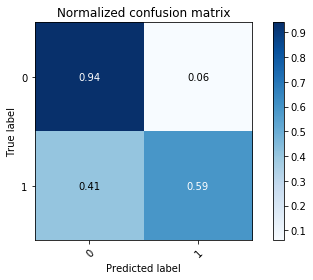

In [18]:
plot_confusion_matrix_2(y_test, y_pred, normalize=True);

### Agora, usando validação cruzada.

In [19]:
resultados = cross_val_score(classificador, x, y, cv = 5)

print("Acurácia média: {:.3} ± {:.3}.".format(resultados.mean(), resultados.std()))

Acurácia média: 0.851 ± 0.00315.
